#Final Project-London UK Airbnb Open Data

#Author: Javier Alessandro Parra Dicillo

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from scipy.stats import ttest_ind

import statsmodels.api as sm
from statsmodels.formula.api import ols

Data Source Information

In [2]:
df_source = pd.read_csv('listings.csv')

In [3]:
df_source.shape

(69351, 18)

In [4]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [5]:
df_source.sample(35)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
24746,23603957,"Large, Clean Double Room in Tooting/Colliers Wood",86301216,Carrie,NaN,Merton,51.422130,-0.176570,Private room,45,2,8,2020-08-03,0.15,1,0,0,NaN
45001,45366168,"Perfect location, good neighbourhood area.",366776951,Mustafa,NaN,Camden,51.525850,-0.122800,Private room,60,3,0,NaN,NaN,1,0,0,NaN
43969,43952803,Stunning double bedroom on Broadway Market!,339488264,Emily,NaN,Hackney,51.537910,-0.062030,Private room,100,3,0,NaN,NaN,2,127,0,NaN
23956,22874815,Incredible 4 Bedroom Family Home in Islington,41546405,Giles,NaN,Islington,51.543560,-0.097410,Entire home/apt,250,6,3,2018-09-27,0.06,1,0,0,NaN
56426,596422198692847764,Spacious 1-Bedroom Apartment on Old Kent Road,97965931,Shievanie,NaN,Southwark,51.489630,-0.081464,Entire home/apt,100,2,1,2022-07-10,0.46,1,2,1,NaN
30513,29602591,Two Bedroom ground floor apartment with parking,222822037,Robert,NaN,Bexley,51.474950,0.180400,Entire home/apt,100,1,0,NaN,NaN,1,0,0,NaN
29256,28027834,"Clean, Modern Flat, Queen Bed, Wembley",124737295,Gary,NaN,Brent,51.572490,-0.290090,Private room,40,28,22,2022-07-04,0.45,4,82,5,NaN
47752,49447503,Double Bedroom - Available for long term only,20203997,Joséphine,NaN,Islington,51.524660,-0.096670,Private room,75,9,2,2022-05-09,0.13,2,13,1,NaN
33857,33187447,1 bedroom next to train station with courtyard,47090197,Ann,NaN,Lambeth,51.454880,-0.103700,Entire home/apt,31,60,13,2020-08-21,0.31,1,0,0,NaN
34697,34188099,Large house in superb West London location,257348764,Katie,NaN,Ealing,51.501360,-0.314200,Entire home/apt,145,3,3,2019-08-09,0.08,2,0,0,NaN


In [6]:
df = df_source.copy()

#Exploratory Data Analysis:

##Data Preparation: Preprocessing, Cleaning and Transformation:

In [7]:
#Drop unnecessary  columns and columns with 0 non-null values
columns_to_drop = ['neighbourhood_group','license','number_of_reviews_ltm']
df = df.drop(columns=columns_to_drop, axis=1)


In [8]:
# Replace null values in specified columns
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')
df['last_review'] = df['last_review'].fillna('2000-01-01')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Display count of null values after replacement for validation
null_counts_after_replacement = df.isnull().sum()
print(null_counts_after_replacement)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [9]:
# Check df information after dropping columns replacing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69351 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69351 non-null  object 
 4   neighbourhood                   69351 non-null  object 
 5   latitude                        69351 non-null  float64
 6   longitude                       69351 non-null  float64
 7   room_type                       69351 non-null  object 
 8   price                           69351 non-null  int64  
 9   minimum_nights                  69351 non-null  int64  
 10  number_of_reviews               69351 non-null  int64  
 11  last_review                     69351 non-null  object 
 12  reviews_per_month               

In [10]:
# Convert data types
df['name'] = df['name'].astype(str)
df['host_name'] = df['host_name'].astype(str)
df['neighbourhood'] = df['neighbourhood'].astype(str)
df['room_type'] = df['room_type'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review']).dt.date

# Display updated data types
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Now we are going to look into the data:

In [11]:
# Display count of unique values for each column
unique_values_count = df.nunique()
print(unique_values_count)

print(" ")
print("Unique values suggest that:")
print("-There are multiple hosts with multiple properties listed as total id is 69351 and total host_id is 45229")
print("-There are 33 different neighbourhoods")
print("-There are four different types of properties")

id                                69351
name                              67030
host_id                           45229
host_name                         13044
neighbourhood                        33
latitude                          28647
longitude                         38106
room_type                             4
price                              1414
minimum_nights                      124
number_of_reviews                   434
last_review                        2729
reviews_per_month                   842
calculated_host_listings_count       77
availability_365                    366
dtype: int64
 
Unique values suggest that:
-There are multiple hosts with multiple properties listed as total id is 69351 and total host_id is 45229
-There are 33 different neighbourhoods
-There are four different types of properties


In [12]:
# Display top and bottom ranking of host_id vs id


# Display top and bottom ranking of host_id vs id
host_id_count = df['host_id'].value_counts().reset_index()
host_id_count.columns = ['host_id', 'listing_count']
host_id_count = host_id_count.sort_values(by='listing_count', ascending=False)  # Corrected sorting
top_10_hosts = host_id_count.head(10)

# Display the result
print("The top hosts with the most properties listed:")
print(" ")
print(top_10_hosts)


The top hosts with the most properties listed:
 
     host_id  listing_count
0   28820321            285
1   33889201            266
2  129230780            259
3  314162972            189
4    1432477            168
5   48165024            165
6  224866971            157
7  258154594            148
8   83740964            127
9  156158778            127


In [13]:
# Display unique values of neighbourhood
unique_neighbourhoods = df['neighbourhood'].unique()

print("London neighbourhoods with properties listed on Airbnb")
print(" ")  

i=1
for n in unique_neighbourhoods:
    print(i, n)
    i+=1


London neighbourhoods with properties listed on Airbnb
 
1 Tower Hamlets
2 Islington
3 Kensington and Chelsea
4 Westminster
5 Harrow
6 Enfield
7 Hammersmith and Fulham
8 Brent
9 Wandsworth
10 Richmond upon Thames
11 Newham
12 Lambeth
13 Barnet
14 City of London
15 Camden
16 Hackney
17 Haringey
18 Merton
19 Ealing
20 Waltham Forest
21 Southwark
22 Hounslow
23 Lewisham
24 Croydon
25 Barking and Dagenham
26 Hillingdon
27 Greenwich
28 Bromley
29 Havering
30 Kingston upon Thames
31 Bexley
32 Redbridge
33 Sutton


In [14]:
# Display unique values of room_type
unique_room_type = df['room_type'].unique()


print("List of room types available on Airbnb")
print(" ")

i=1
for n in unique_room_type:
    print(i, n)
    i+=1



List of room types available on Airbnb
 
1 Private room
2 Entire home/apt
3 Hotel room
4 Shared room


##Summary Statistics:

In [15]:
print("Looking at stats of continuous variables:")

df.describe()

Looking at stats of continuous variables:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.935100e+04,6.935100e+04,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,1.373703e+17,1.242124e+08,51.509544,-0.128489,177.208822,5.997505,17.537051,0.669043,11.987498,108.520266
std,2.651479e+17,1.377104e+08,0.049182,0.100957,412.823024,25.709514,40.410763,1.172270,37.148839,132.821088
min,1.391300e+04,4.775000e+03,51.272480,-0.523600,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.810090e+07,1.870718e+07,51.483140,-0.189520,55.000000,1.000000,1.000000,0.010000,1.000000,0.000000
50%,3.395467e+07,6.010350e+07,51.513600,-0.126200,100.000000,2.000000,4.000000,0.200000,1.000000,32.000000
75%,5.265645e+07,1.960405e+08,51.539710,-0.068550,180.000000,4.000000,16.000000,0.850000,4.000000,228.000000
max,7.123951e+17,4.788540e+08,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000


Price:
-The maximum value is 25000£ and we might not want to take it into account for the analysis as it is impacting mean, std, etc.
-The minimum value is 0£ and we have to think why a property is listed as 0£ and whether we want to include them in the analysis.

Minimum nights:
-The maximum value apparently is 1125 nights and we might not want to keep it in the analysis.

Availability_365:
-The minimum value is 0 meaning that some properties are not available. 


We are going to handle outliers

#Handling outliers for columns price, minimum nights, and availability

In [16]:
# Handle outliers for 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)

IQR_price = Q3_price - Q1_price

lower_bound_price = int(Q1_price - 1.5 * IQR_price)
upper_bound_price = int(Q3_price + 1.5 * IQR_price)

# Replacing values greater than upper_bound_price with upper_bound_price
df['price'] = df['price'].clip(lower=None, upper=upper_bound_price)

In [17]:
# Handle outliers for 'minimum_nights'
Q1_min_nights = df['minimum_nights'].quantile(0.25)
Q3_min_nights = df['minimum_nights'].quantile(0.75)

IQR_min_nights = Q3_min_nights - Q1_min_nights

lower_bound_min_nights = int(Q1_min_nights - 1.5 * IQR_min_nights)
upper_bound_min_nights = int(Q3_min_nights + 1.5 * IQR_min_nights)

# Replacing values greater than upper_bound_price with upper_bound_price
df['minimum_nights'] = df['minimum_nights'].clip(lower=None, upper=upper_bound_min_nights)

In [18]:
# Handle outliers for 'availability_365'
Q1_availability = df['availability_365'].quantile(0.25)
Q3_availability = df['availability_365'].quantile(0.75)

IQR_availability = Q3_availability - Q1_availability

lower_bound_availability = int(Q1_availability - 1.5 * IQR_availability)
upper_bound_availability = int(Q3_availability + 1.5 * IQR_availability)

# Replacing values greater than upper_bound_price with upper_bound_price
df['availability_365'] = df['availability_365'].clip(lower=None, upper=upper_bound_availability)

In [19]:
#Now let's see how the stats were adjusted

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.935100e+04,6.935100e+04,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,1.373703e+17,1.242124e+08,51.509544,-0.128489,133.179493,3.140531,17.537051,0.669043,11.987498,108.520266
std,2.651479e+17,1.377104e+08,0.049182,0.100957,101.251135,2.250711,40.410763,1.172270,37.148839,132.821088
min,1.391300e+04,4.775000e+03,51.272480,-0.523600,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.810090e+07,1.870718e+07,51.483140,-0.189520,55.000000,1.000000,1.000000,0.010000,1.000000,0.000000
50%,3.395467e+07,6.010350e+07,51.513600,-0.126200,100.000000,2.000000,4.000000,0.200000,1.000000,32.000000
75%,5.265645e+07,1.960405e+08,51.539710,-0.068550,180.000000,4.000000,16.000000,0.850000,4.000000,228.000000
max,7.123951e+17,4.788540e+08,51.708930,0.305150,367.000000,8.000000,1141.000000,51.330000,285.000000,365.000000


Price:
-The maximum value is 367.5£ which is more reasonable
-The minimum value is 0£ and we have to think why a property is listed as 0£ and whether we want to include them in the analysis.

Minimum nights:
-The maximum value is 9 nights which is more reasonable

Availability_365:
-The maximum value is now 365.

Objectives:

- What is the most popular neighborhood?
- what is the most expensive neighbourhood?
- What is the avg price per neighbourhood?
- What is the most popular room type overall
- What is the most popular room type per neighbourhood?
- What is the min night per room type overall?
- What is the most active neighbourhood? most number of last review in the 3 most recent months 

#Data Visualisation

##Visualisation 1: What is the most popular neighborhood?

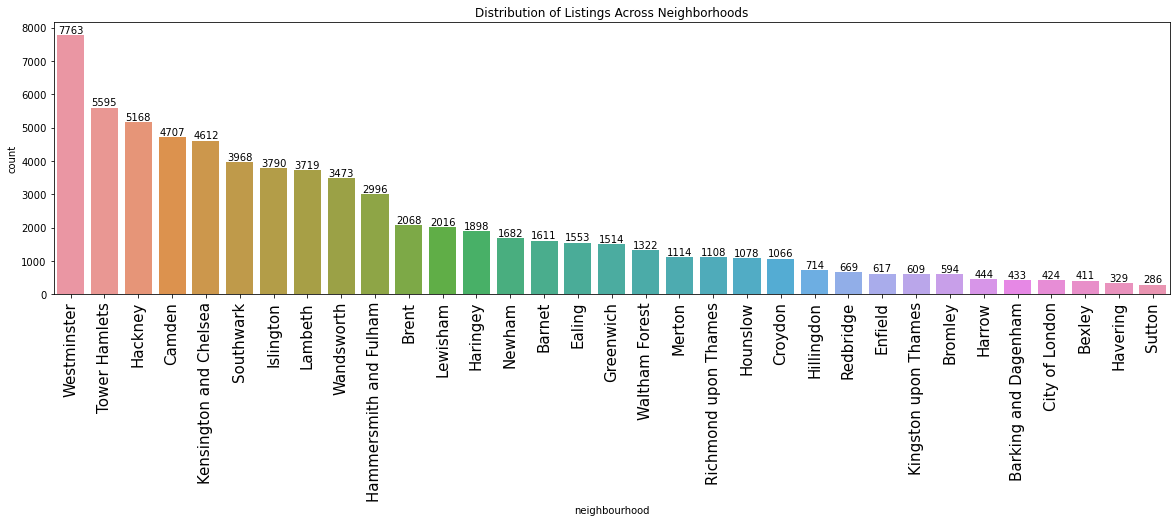

In [20]:
# Plot the distribution of listings across neighborhoods

plt.figure(figsize=(20, 5))

labels_1 = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)

# Add count labels to each bar
for p in labels_1.patches:
    labels_1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

plt.xticks(rotation=90,fontsize=15)
plt.title('Distribution of Listings Across Neighborhoods')
plt.show()

##Visualisation 2: What is the most expensive neighbourhood?

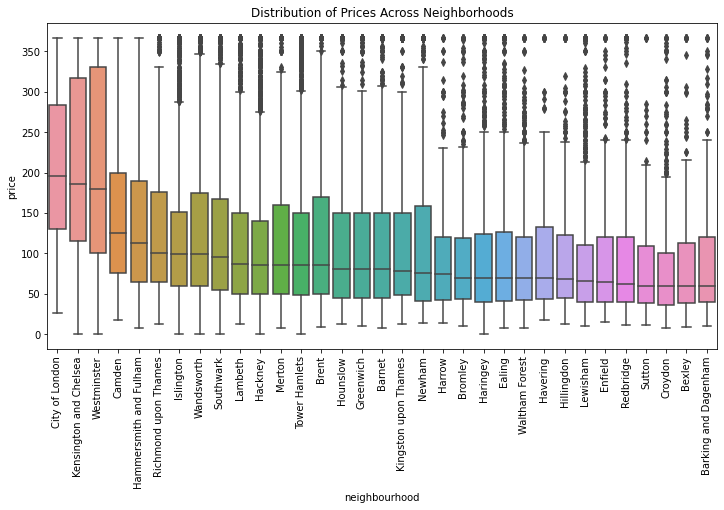

In [21]:
# Create a boxplot to visualize the distribution of prices across neighborhoods
plt.figure(figsize=(12, 6))

labels_2 = sns.boxplot(x='neighbourhood', y='price', data=df, order=df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index)

# Add count labels to each bar
for p in labels_2.patches:
    labels_2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')


plt.xticks(rotation=90)
plt.title('Distribution of Prices Across Neighborhoods')
plt.show()

##Visualisation 3: Average price per neighbourhood

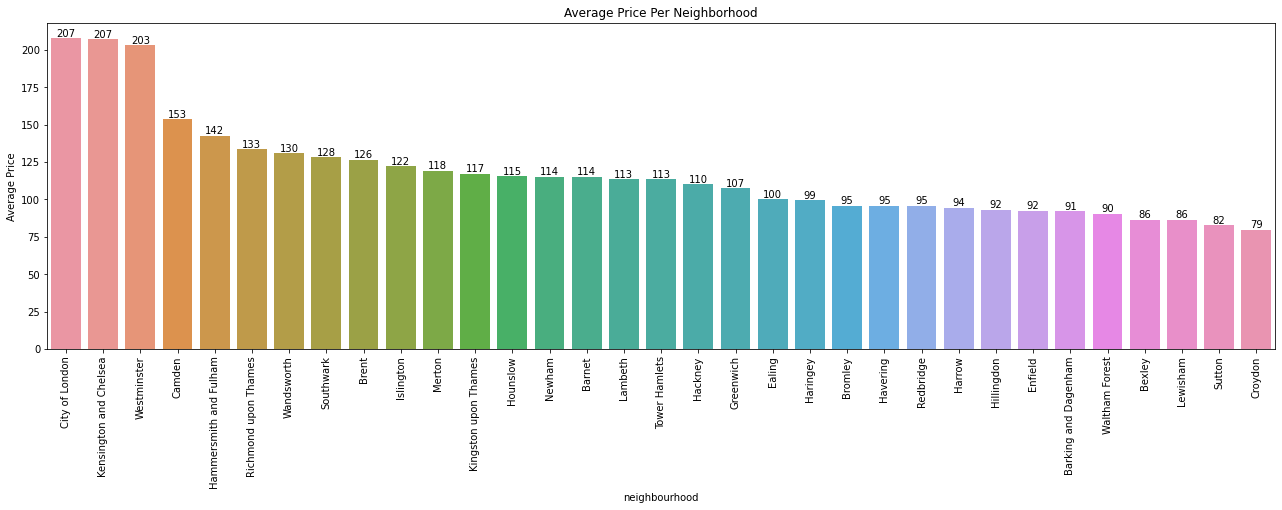

In [22]:
# Calculate the average price per neighborhood
avg_price_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Plot the average price per neighborhood
plt.figure(figsize=(22, 6))

labels_3 = sns.barplot(x=avg_price_neighborhood.index, y=avg_price_neighborhood.values)

# Add count labels to each bar
for p in labels_3.patches:
    labels_3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')


plt.xticks(rotation=90)
plt.title('Average Price Per Neighborhood')
plt.ylabel('Average Price')
plt.show()

##Visualisation 4: What is the most popular room type overall

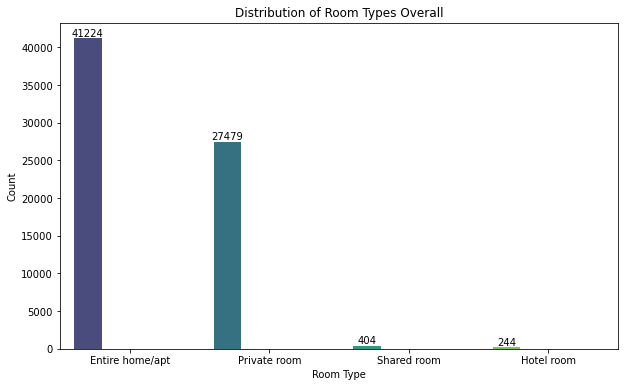

In [23]:
# Calculate the distribution of room types
room_type_distribution = df['room_type'].value_counts()

# Plot a bar chart to visualize the distribution of room types
plt.figure(figsize=(10, 6))

labels_4 = sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values, palette='viridis')

bar_width = 0.2
# Add count labels to each bar
for p in labels_4.patches:
    p.set_width(bar_width)
    labels_4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Distribution of Room Types Overall')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Shared Rooms and Hotel Rooms can be ignored on Airbnb

##Visualisation 5:  What is the most popular room type per neighbourhood?

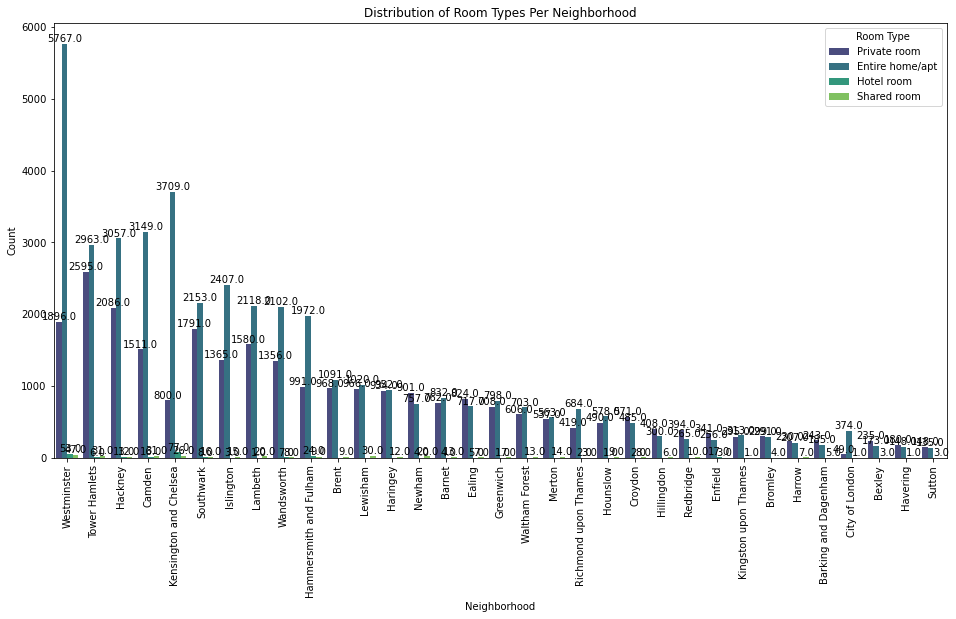

In [24]:
# Create a grouped bar chart to visualize the distribution of room types per neighborhood
plt.figure(figsize=(16, 8))

labels_5 = sns.countplot(x='neighbourhood', hue='room_type', data=df, order=df['neighbourhood'].value_counts().index, palette='viridis')

# Add count labels to each bar
for p in labels_5.patches:
    labels_5.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')


plt.xticks(rotation=90)
plt.title('Distribution of Room Types Per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type', loc='upper right')
plt.show()

##Visualisation 6: What is the min night per room type overall?

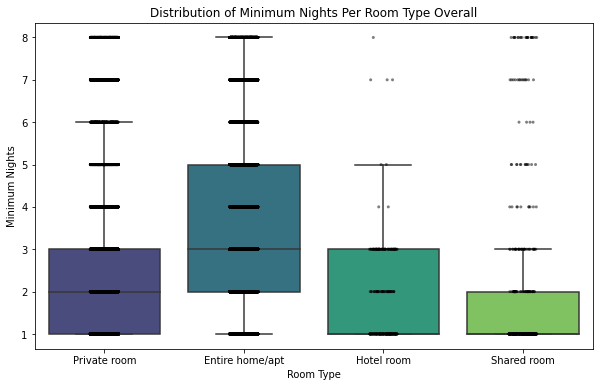

In [59]:
# Create a boxplot to visualize the distribution of minimum nights per room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='minimum_nights', data=df, palette='viridis', showfliers=False)  # Set showfliers=False to exclude outliers
sns.stripplot(x='room_type', y='minimum_nights', data=df, color='black', size=3, alpha=0.5)  # Add strip plot to show individual data points
plt.title('Distribution of Minimum Nights Per Room Type Overall')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.show()

Room availability per neighbourhood

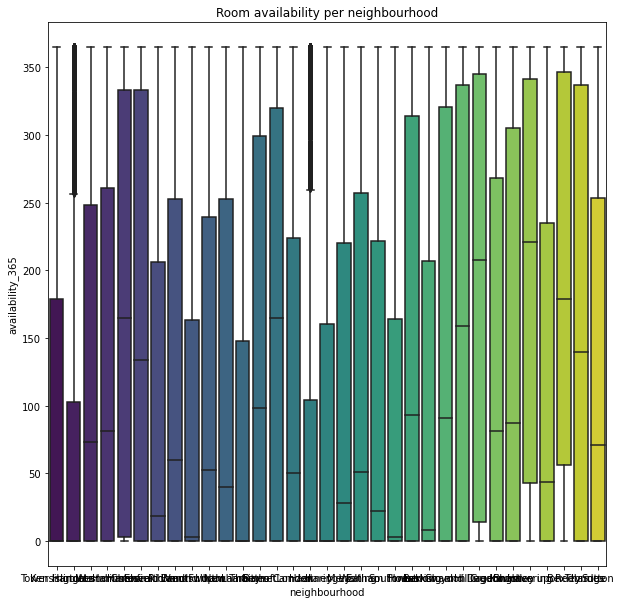

In [26]:
plt.figure(figsize=(10,10))

plot_1 = sns.boxplot(data=df, x="neighbourhood",y="availability_365",palette='viridis')

plt.title('Room availability per neighbourhood')
plt.show()

Listings on the map

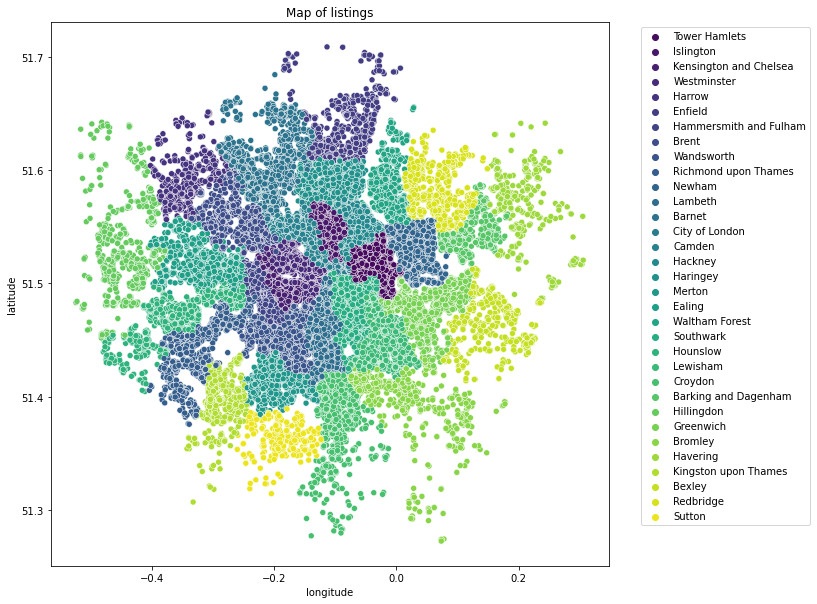

In [27]:
plt.figure(figsize=(10, 10))

plot_2 = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood, palette='viridis')

plt.title('Map of listings')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ioff()
plt.show()

Room types on the map

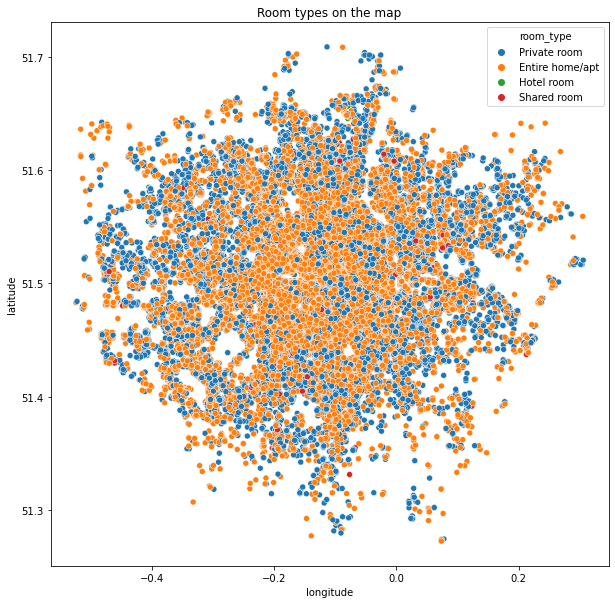

In [45]:
plt.figure(figsize=(10, 10))

custom_palette_tab10 = sns.color_palette("tab10", n_colors=len(df['room_type'].unique()))

plot_3 = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette=custom_palette_tab10)

plt.title('Room types on the map')

plt.show()

Availability on the map

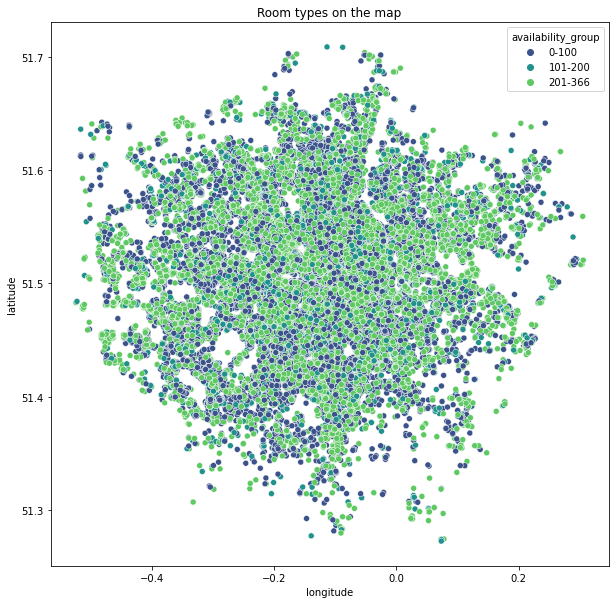

In [47]:
# Define the bins for availability_365
bins = [0, 100, 200, 366]
labels = ['0-100', '101-200', '201-366']

# Create a new column 'availability_group' based on the bins
df['availability_group'] = pd.cut(df['availability_365'], bins=bins, labels=labels, right=False)

# Plot the scatterplot with the specified groups
plt.figure(figsize=(10, 10))
plot_4 = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df['availability_group'], palette='viridis')

plt.title('Room types on the map')
plt.show()

#Correlation Analysis:

##Correlation Matrix

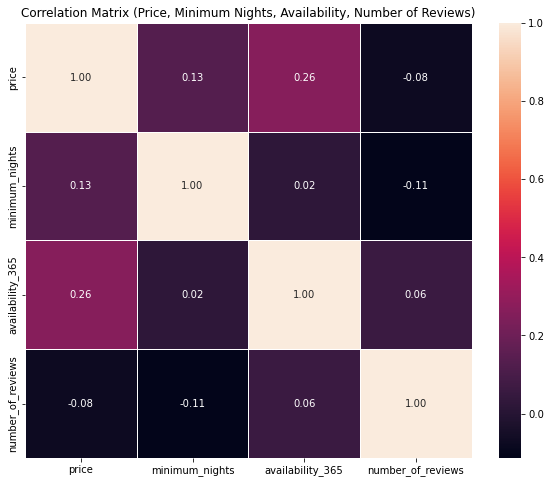

In [54]:
# Relevant columns for correlation analysis
selected_columns = ['price', 'minimum_nights', 'availability_365', 'number_of_reviews']

# Subset of the DataFrame with selected columns
selected_df = df[selected_columns]

# Compute correlation matrix
correlation_matrix = selected_df.corr()

# Display heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Price, Minimum Nights, Availability, Number of Reviews)')
plt.show()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'month',
       'availability_group'],
      dtype='object')

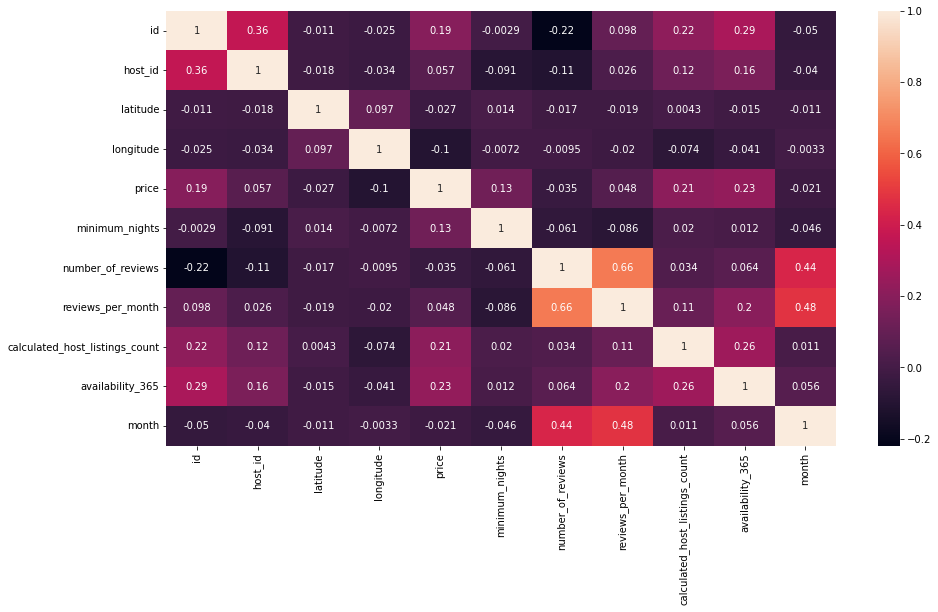

In [55]:
correlation_check = df.corr(method="kendall")
plt.figure(figsize=(15,8))

sns.heatmap(correlation_check, annot=True)
df.columns

                        sum_sq       df          F  PR(>F)
C(neighbourhood)  9.878401e+07     32.0  349.54662     0.0
Residual          6.121778e+08  69318.0        NaN     NaN


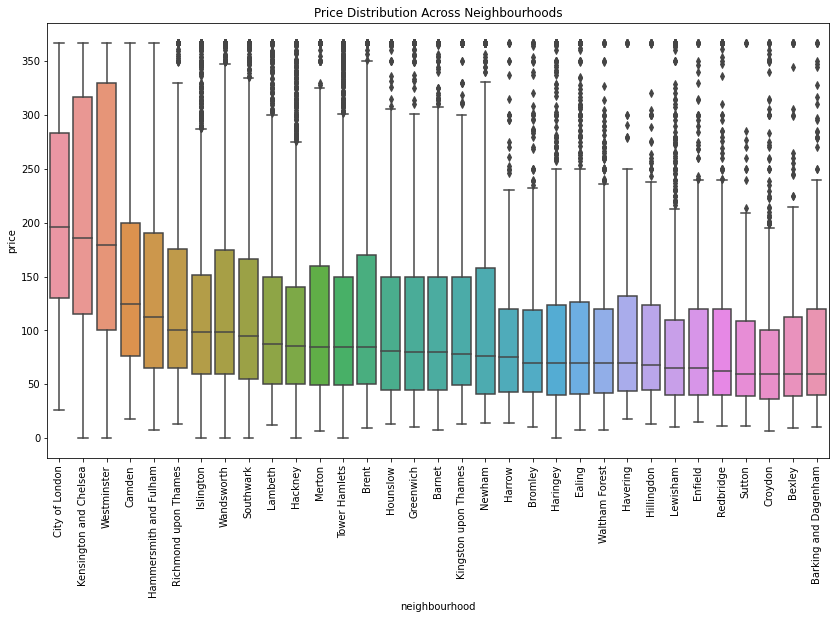

In [33]:
# Perform ANOVA test
model = ols('price ~ C(neighbourhood)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Visualize differences in mean prices across neighbourhoods
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df, order=df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Neighbourhoods')
plt.show()

#Exploring Temporal Patterns

1. Time Series Analysis:
Convert the 'last_review' column to a datetime format.
Create a time series plot to visualize the number of reviews over time.

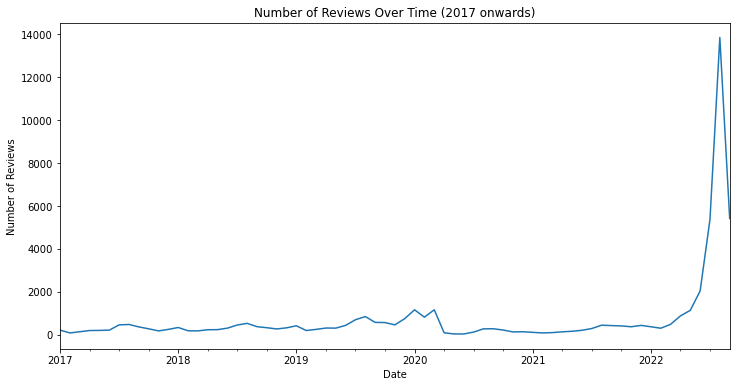

In [34]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Filter data to include records from 2017 onwards
df_recent = df[df['last_review'].dt.year >= 2017]

# Create a time series plot for reviews from 2017 onwards
plt.figure(figsize=(12, 6))
df_recent.set_index('last_review')['number_of_reviews'].resample('M').count().plot()
plt.title('Number of Reviews Over Time (2017 onwards)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

2. Seasonal Trends:
Analyze if there are seasonal trends in the data by grouping the data by months or other time intervals.

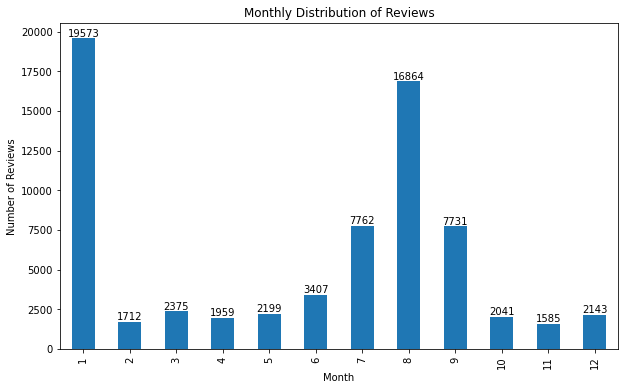

In [35]:
# Extract month from 'last_review' and create a bar plot
df['month'] = df['last_review'].dt.month
plt.figure(figsize=(10, 6))

labels6 = df.groupby('month')['number_of_reviews'].count().plot(kind='bar')

# Add count labels to each bar
for p in labels6.patches:
    labels6.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')


plt.title('Monthly Distribution of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

3. Review Frequency:
Analyze the frequency of reviews per month to identify patterns or changes in activity.

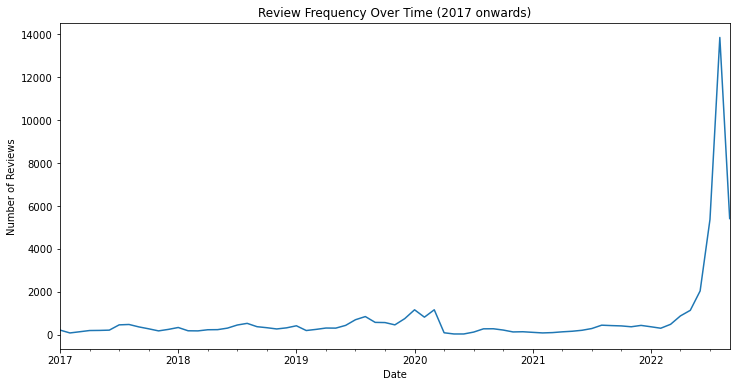

In [36]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Filter data to include records from 2017 onwards
df_recent = df[df['last_review'].dt.year >= 2017]

# Resample data to monthly frequency and plot review frequency
plt.figure(figsize=(12, 6))
df_recent.set_index('last_review').resample('M')['number_of_reviews'].count().plot()
plt.title('Review Frequency Over Time (2017 onwards)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

4. Availability Over Time:
Explore how availability changes over time.

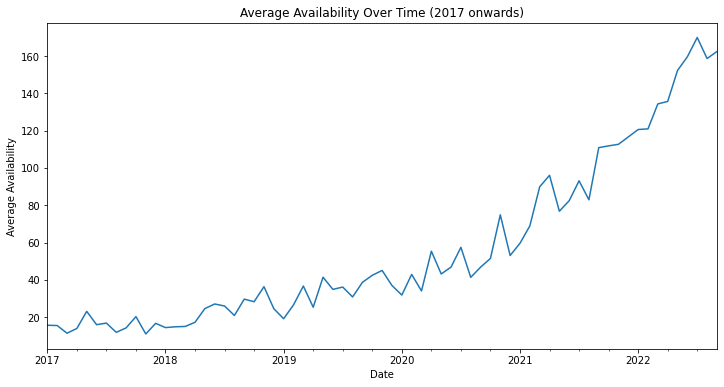

In [37]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Filter data to include records from 2017 onwards
df_recent = df[df['last_review'].dt.year >= 2017]

# Resample data to monthly frequency and plot availability
plt.figure(figsize=(12, 6))
df_recent.set_index('last_review').resample('M')['availability_365'].mean().plot()
plt.title('Average Availability Over Time (2017 onwards)')
plt.xlabel('Date')
plt.ylabel('Average Availability')
plt.xlim(pd.Timestamp('2017-01-01'))  # Set the x-axis limit to start from 2017
plt.show()

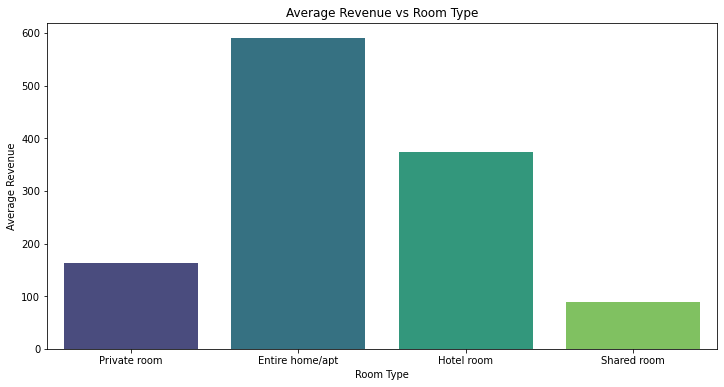

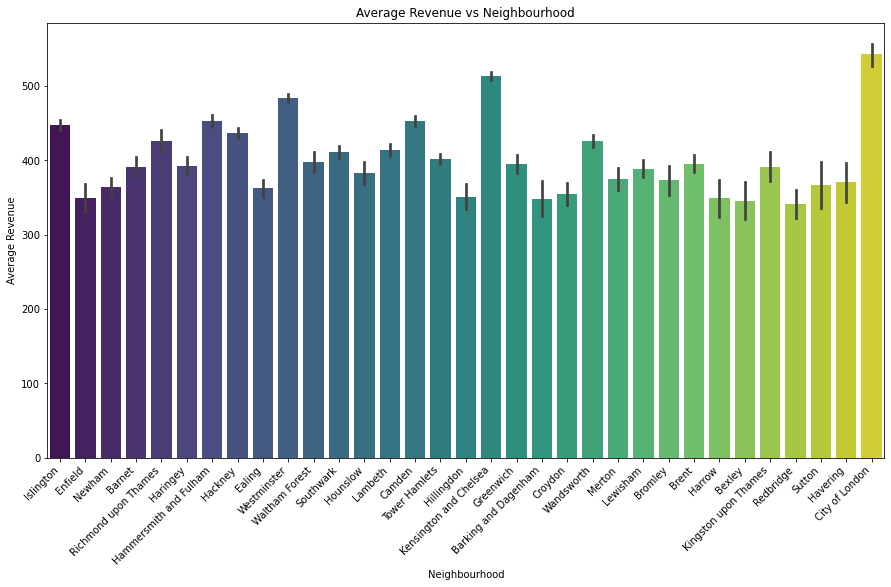

In [61]:
# Calculate average price per room type
avg_price_room_type = df_recent.groupby('room_type')['price'].mean().reset_index()
avg_price_room_type.columns = ['room_type', 'average_price']

# Calculate average minimum nights per room type
avg_min_nights_room_type = df_recent.groupby('room_type')['minimum_nights'].mean().reset_index()
avg_min_nights_room_type.columns = ['room_type', 'average_minimum_nights']

# Merge the two DataFrames on 'room_type'
df_recent = pd.merge(df_recent, avg_price_room_type, on='room_type')
df_recent = pd.merge(df_recent, avg_min_nights_room_type, on='room_type')

# Calculate average revenue and add a new column to the DataFrame
df_recent['average_revenue'] = df_recent['average_price'] * df_recent['average_minimum_nights']


# Plot average revenue vs room type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='average_revenue', data=df_recent, palette='viridis')
plt.title('Average Revenue vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Revenue')
plt.show()

# Plot average revenue vs neighbourhood
plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood', y='average_revenue', data=df_recent, palette='viridis')
plt.title('Average Revenue vs Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


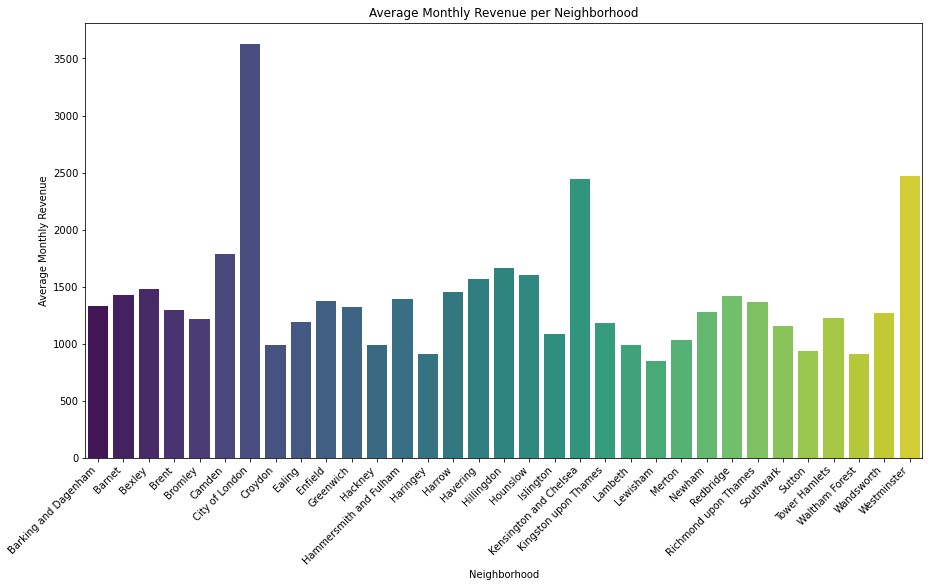

In [62]:
# Calculate average annual revenue for each listing
df_recent['average_annual_revenue'] = df_recent['price'] * df_recent['availability_365']

# Calculate average monthly revenue for each listing
df_recent['average_monthly_revenue'] = df_recent['average_annual_revenue'] / 12

# Group by neighborhood and calculate the mean of average monthly revenue
avg_monthly_revenue_neighbourhood = df_recent.groupby('neighbourhood')['average_monthly_revenue'].mean().reset_index()

# Plot average monthly revenue per neighborhood
plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood', y='average_monthly_revenue', data=avg_monthly_revenue_neighbourhood, palette='viridis')
plt.title('Average Monthly Revenue per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#Conclusions

Objectives:

What is the most popular neighborhood?

what is the most expensive neighbourhood?

What is the avg price per neighbourhood?

What is the most popular room type overall

What is the most popular room type per neighbourhood?

What is the min night per room type overall?

What is the most active neighbourhood? most number of last review in the 3 most recent months

